In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from statsmodels. tsa.stattools import adfuller
import scipy
df = pd.read_csv('/content/DJIA_table.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

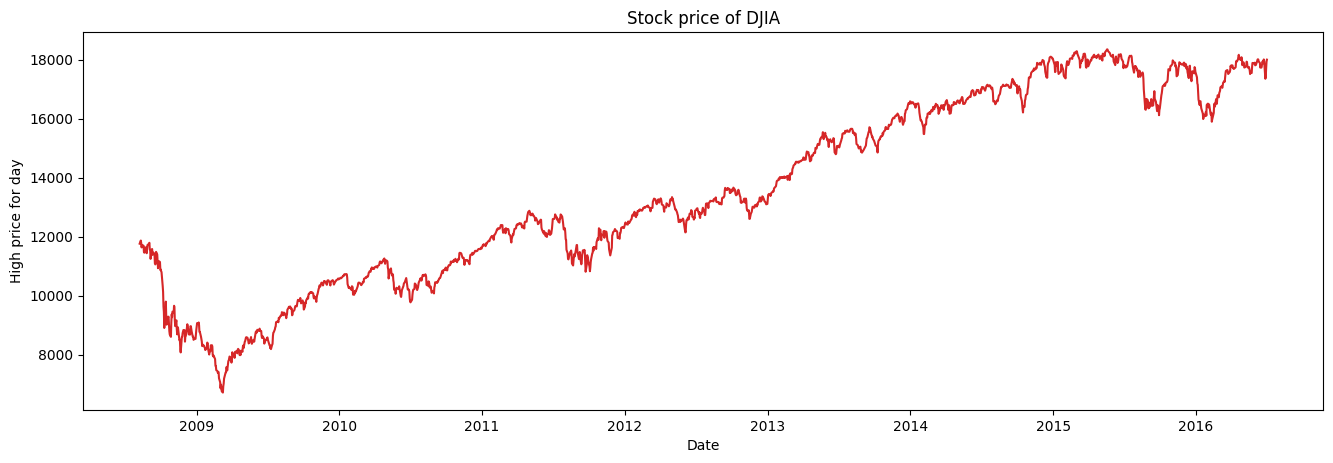

In [ ]:
def plot_df(dataset, x, y, title="", xlabel='Date', 
            ylabel='High price for day', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.Date, y=df.High, title='Stock price of DJIA')

In [ ]:
# Определяем функцию для теста ADF
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Число лагов','Число наблюднений'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df.High)

Results of Dickey-Fuller Test:
Test Statistic            -1.255112
p-value                    0.649450
Число лагов                2.000000
Число наблюднений       1986.000000
Critical Value (1%)       -3.433647
Critical Value (5%)       -2.862996
Critical Value (10%)      -2.567545
dtype: float64


In [ ]:
!pip install emd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import emd
imf = emd.sift.sift(df.High)
imf

/usr/local/lib/python3.9/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]


array([[ 4.01167589e+02,  6.66719087e+01, -1.21801425e+02,
         4.86385299e+02,  2.83810159e+01,  1.71415765e+04],
       [ 3.50048713e+02,  1.41096132e+01, -1.05002445e+02,
         5.01397139e+02,  3.14081563e+01,  1.71386482e+04],
       [ 1.49071189e+02, -4.97381031e+01, -8.31099896e+01,
         5.18082448e+02,  3.44471778e+01,  1.71357570e+04],
       ...,
       [ 2.13069418e+01,  1.41476795e+02, -1.36919677e+01,
         4.83440260e+00,  1.87198161e+03,  9.75644183e+03],
       [ 8.27089418e+01,  1.72155998e+02, -3.52365359e+00,
        -2.46274823e-02,  1.85847199e+03,  9.75732171e+03],
       [-1.52405614e+01,  1.66768152e+02,  1.54490172e+01,
        -1.09393351e+01,  1.84574803e+03,  9.75817466e+03]])

<AxesSubplot:xlabel='Time (samples)'>

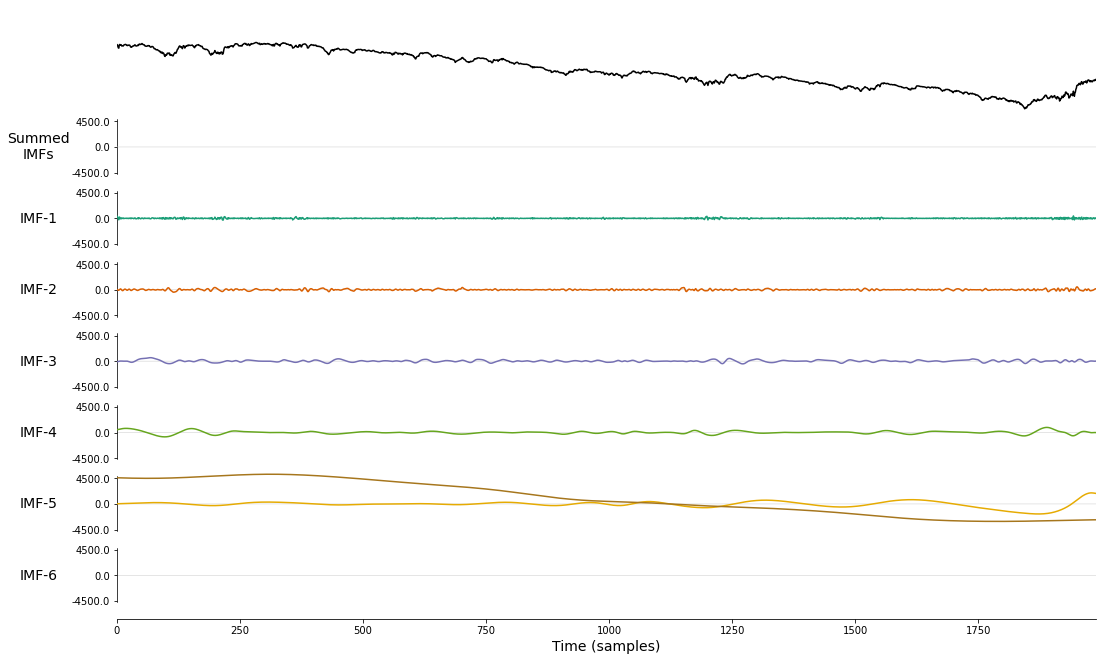

In [ ]:
emd.plotting.plot_imfs(imf, cmap=True)

In [ ]:
IMF = [item[5] for item in imf]

In [ ]:
New_time_series = df.High - IMF

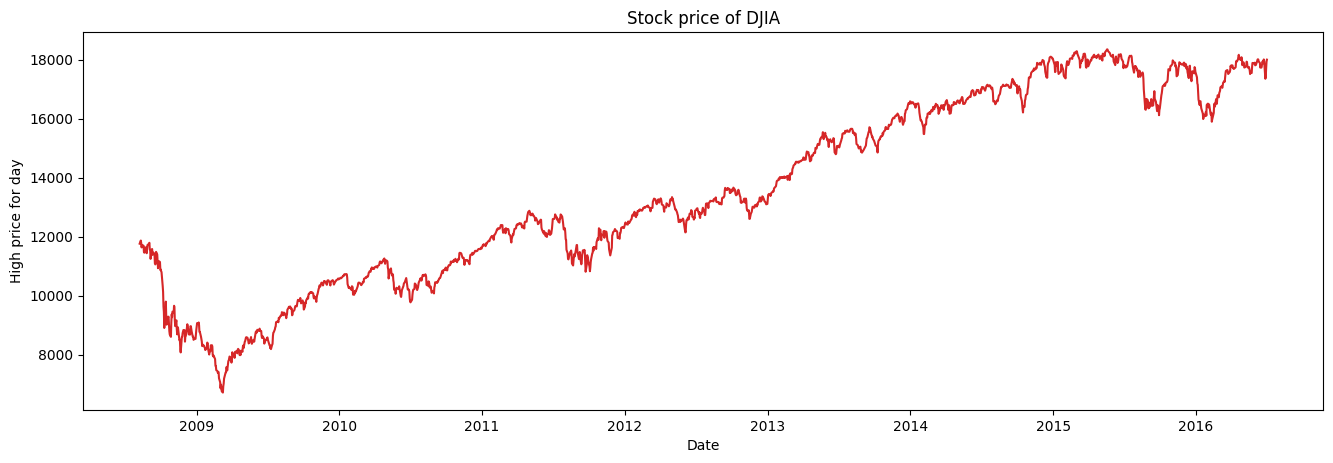

In [ ]:
plot_df(New_time_series, x=df.Date, y=df.High, title='Stock price of DJIA')

In [ ]:
test_stationarity(New_time_series)

Results of Dickey-Fuller Test:
Test Statistic            -3.520151
p-value                    0.007484
Число лагов                2.000000
Число наблюднений       1986.000000
Critical Value (1%)       -3.433647
Critical Value (5%)       -2.862996
Critical Value (10%)      -2.567545
dtype: float64


In [ ]:
x = df['Date']
y = New_time_series

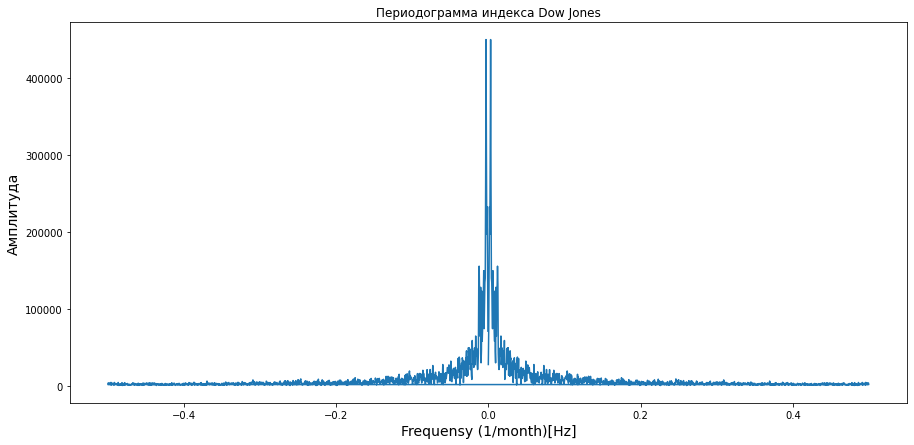

In [ ]:
y_rift = abs(scipy.fft.fft(y.values))
freq = scipy.fft.fftfreq(len(y))
plt.figure(figsize = (15, 7))
plt.plot(freq, y_rift)
plt.title('Периодограмма индекса Dow Jones')
plt.xlabel('Frequensy (1/month)[Hz]', fontsize = 14)
plt.ylabel('Амплитуда', fontsize = 14)
plt.show()

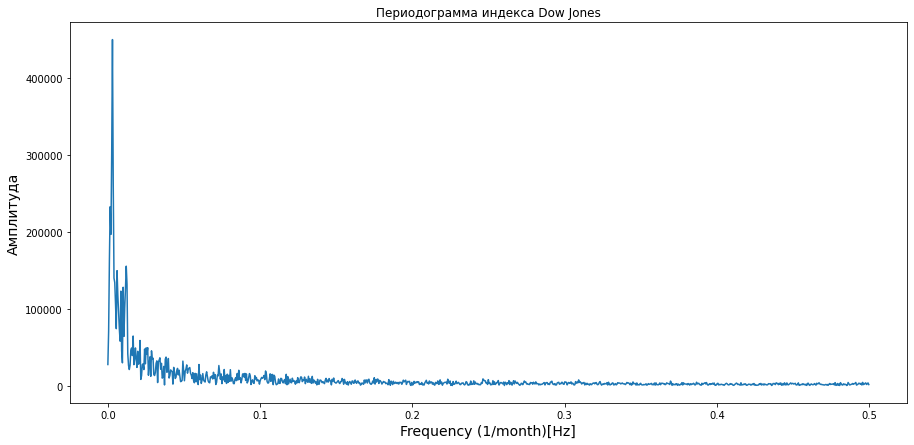

In [ ]:
y_rift = abs(scipy.fft.rfft(y.values))
freq = scipy.fft.rfftfreq(len(y))
plt.figure(figsize = (15, 7))
plt.plot(freq, y_rift)
plt.title('Периодограмма индекса Dow Jones')
plt.xlabel('Frequency (1/month)[Hz]', fontsize = 14)
plt.ylabel('Амплитуда', fontsize = 14)
plt.show()

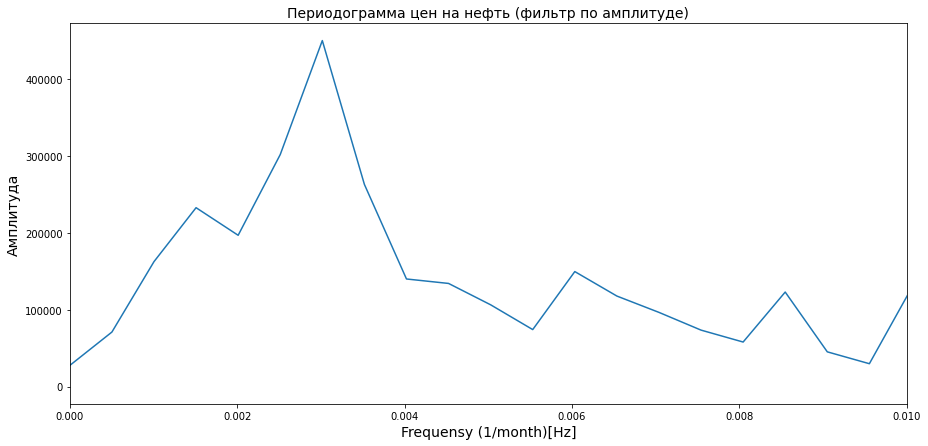

In [ ]:
threshold = 20000
for i in range(len(y_rift)):
    if y_rift[i] < threshold:
        y_rift[i] = 0
plt.figure(figsize = (15, 7))
plt.plot(freq, y_rift)
plt.title('Периодограмма цен на нефть (фильтр по амплитуде)', fontsize = 14)
plt.xlabel('Frequensy (1/month)[Hz]', fontsize = 14)
plt.ylabel('Амплитуда', fontsize = 14)
plt.xlim(0, 0.01)
plt.show()